<h2 align="center">Implementation of the Logistic Regression Classification Algorithm</h2>
<h4 align="center">Machine Learning & Data Mining - Assignment 3</h4>
<h4 align="center">Stephen Dooley - 12502947 - 23/11/15</h4> 

### (1) Import Dataset

In [33]:
import pandas as pd
# import csv to visualise data
df = pd.read_csv('../data/owls-csv.csv')

### (2) Graphing the Dataset

The data is divided into each of the following types of owl:
* Long Eared Owl
* Snowy Owl
* Barn Owl

Each instance contains data about the body length, wing length, body width and wing width of a given owl. The plot below illustrates the categorical data by dividing each of the owl types by a line separator. See the legend on the plot for more information.

Populating the interactive namespace from numpy and matplotlib
Enter preferred max value for y-axis:
(For current dataset enter 9)
9


/Users/stephen/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


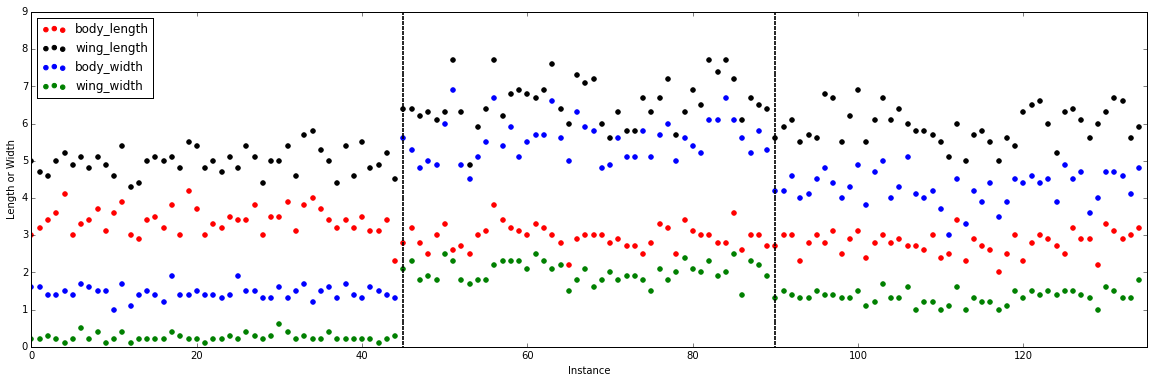

In [36]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
%pylab inline

# get user input 
y_max = int(input('Enter preferred max value for y-axis:\n(For current dataset enter 9)\n'));

# generify plot variable to work for different number of attributes
number_of_instances = len(df.type);
instances_per_class = number_of_instances/number_of_classes;

# initliase the dividers for the graph
# helps to build a visualisation of the classes
x_divider_one = [instances_per_class]*number_of_instances; 
x_divider_two = [instances_per_class*2]*number_of_instances;
y_divider = np.arange(0, y_max, y_max/number_of_instances);

# setup figure
fig = plt.figure(figsize=(20, 6));
ax1 = fig.add_subplot(111);
# plot the data 
cm_bright = ListedColormap(['#FF0000', '#0000FF']);

''' scatter(x, y, marker size, color, marker color style, label) '''
ax1.scatter(np.arange(number_of_instances), df.body_length, color='red', cmap=cm_bright, label='body_length');
ax1.scatter(np.arange(number_of_instances), df.wing_length, color='black', cmap=cm_bright, label='wing_length'); 
ax1.scatter(np.arange(number_of_instances), df.body_width, color='blue', cmap=cm_bright, label='body_width'); 
ax1.scatter(np.arange(number_of_instances), df.wing_width, color='green', cmap=cm_bright, label='wing_width');
ax1.scatter(x_divider_one, y_divider, s=1, color='black', cmap=cm_bright);
ax1.scatter(x_divider_two, y_divider, s=1, color='black', cmap=cm_bright);
ax1.set_xlim(0, number_of_instances)
ax1.set_ylim(0, y_max);
ax1.set_xlabel('Instance');
ax1.set_ylabel('Length or Width');
ax1.legend(loc='upper left');

### (3) Data  and Testing Observations
As seen from the plot above, the attributes of the Long Eared Owl (left), are easily differentiated from the those of the Snowy Owl (middle) and Barn Owl (right). It is observed that the body length for all three types of owl is similiar. Although all three types of owl share similar body length it appears as though error in the algorithm may arrise when trying to distinguish between the Snowy Owl and Barn Owl. These two types of owl contain similar ranges of values for body length, wing length, body width and wing width. Training the model to distinguish the difference between the Snowy Owl (middle) and Barn Owl (right) will be the most difficult due to the similarities in their attributes.

In logistic regression, the predictions of the model are constrained to the range [0,1]. This is to alow the value to be interpretted as an estimation of the probability. The estimated probability is used to predict which type of owl the instance in question belongs to. By using the logit function (inverse of logistic function), it is possible to translate the predictions from the range [−∞,∞] to [0,1]. It translates a *K*-dimensional vector $x$ of real values to a *K*-dimensional vector $\sigma(\mathbf{x})$ of real values in the range (0, 1). $\sigma(\mathbf{x})$ represents the predicted probablilties, and the sum of all probabilities of the vector $\sigma(\mathbf{x})$ add up to 1. The logistic function (or softmax function for multiclass tasks) of a number x between 0 and 1 is given by:

$$ \sigma(\mathbf{x})_j = \frac{e^{\mathbf{x}k}}{\sum_{k}^{K} e^{\mathbf{x}k}} $$

The graph of the logit function can be seen below:

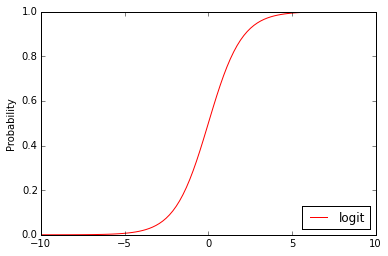

In [35]:
x = np.linspace(-10, 10, 100)
y = 1.0 / (1.0 + np.exp(-x))
ax2 = plt.subplot(111)
ax2.plot(x, y, 'r-', label='logit')
ax2.set_ylabel('Probability');
ax2.legend(loc='lower right')

#### (3.1) Softmax vs. Sigmoid
The sigmoid function is used for binary classification. The sigmoid function is given by: $ \sigma(x)_j = \frac{1}{1 + e^{-x}} $

The softmax function is used for multi-class problems such as this one (3 types of owl). Whereas the softmax function is given by (for vector x): $ \sigma(\mathbf{x})_j = \frac{e^{\mathbf{x}k}}{\sum_{k}^{K} e^{\mathbf{x}k}} $

Both functions bind the predicted probabilities to the range [0,1]. The softmax function is an adaptation of the sigmoid, whereby the vertor sum of the exponentials is the denominator.

Two factors that heavily influence the performance of the model are the learning rate and the number of epochs the model is run for whilst training. The lower the learning rate, the slower it learns. With low learning rates it is easier to observe the changes in the predicticted probabilities as the model is trained. The number of iterations will affect the speed and accuracy of the model also. Running iterations infinitly will be worthless as the accuracy will plateau eventually. For this model, the acuuracy plateuad at approximately 500 iterations.

### (3) Prepare Data
The data is divided into 2 files:
* The raw input data for each instance eg. [body length, body width, wing length, wing width]
* The type of owl for each instance.

The dataset contains 135 instances which is split 2/3 for training the model, and 1/3 for testing the model. The data is normalised by dividing each attribute (eg. body length) by the max value for all owls. This can be done 